<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.103589,73.632622,91.514808,68.763185,-0.001647,296.012556,296.013827,-0.001271
1,0.0,1.0,36.544244,88.511270,79.994570,66.985922,-0.000215,282.035791,282.035638,0.000153
2,0.0,2.0,97.136115,55.881259,35.835687,51.923506,0.005920,250.782487,250.777606,0.004881
3,0.0,3.0,52.978892,44.066280,49.636745,79.403796,-0.005025,236.080689,236.086337,-0.005648
4,0.0,4.0,49.998445,78.301770,27.127977,41.828343,-0.001371,207.255164,207.257179,-0.002015
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.337755,56.981665,41.491724,45.213921,-0.002319,205.022746,205.024685,-0.001939
249996,999.0,246.0,55.256451,65.767662,37.224950,54.241923,0.000623,222.491610,222.490735,0.000875
249997,999.0,247.0,64.453034,79.702560,99.185119,72.433356,-0.000612,325.773457,325.774005,-0.000548
249998,999.0,248.0,23.613787,51.490928,39.846490,76.849344,-0.001895,201.798655,201.801339,-0.002684


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.103589,73.632622,91.514808,68.763185,-0.001647,296.012556,296.013827,-0.001271
1,0.0,1.0,36.544244,88.511270,79.994570,66.985922,-0.000215,282.035791,282.035638,0.000153
2,0.0,2.0,97.136115,55.881259,35.835687,51.923506,0.005920,250.782487,250.777606,0.004881
3,0.0,3.0,52.978892,44.066280,49.636745,79.403796,-0.005025,236.080689,236.086337,-0.005648
4,0.0,4.0,49.998445,78.301770,27.127977,41.828343,-0.001371,207.255164,207.257179,-0.002015
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.337755,56.981665,41.491724,45.213921,-0.002319,205.022746,205.024685,-0.001939
249996,999.0,246.0,55.256451,65.767662,37.224950,54.241923,0.000623,222.491610,222.490735,0.000875
249997,999.0,247.0,64.453034,79.702560,99.185119,72.433356,-0.000612,325.773457,325.774005,-0.000548
249998,999.0,248.0,23.613787,51.490928,39.846490,76.849344,-0.001895,201.798655,201.801339,-0.002684


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -0.001647  296.012556   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.000215  282.035791   
      2.0    97.136115  55.881259  35.835687  51.923506  0.005920  250.782487   
      3.0    52.978892  44.066280  49.636745  79.403796 -0.005025  236.080689   
      4.0    49.998445  78.301770  27.127977  41.828343 -0.001371  207.255164   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -0.002319  205.022746   
      246.0  55.256451  65.767662  37.224950  54.241923  0.000623  222.491610   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.000612  325.773457   
      248.0  23.613787  51.490928  39.846490  76.849344 -0.001895  201.798655   
      249.0  31.254839  70.499767  39.292322  56.092702  0.004395  207.144025   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.013827 -0.001271  
      1.0    282.035638  0.000153  
      2.0    250.777606  0.004881  
      3.0    236.086337 -0.005648  
      4.0    207.257179 -0.002015  
...                 ...       ...  
999.0 245.0  205.024685 -0.001939  
      246.0  222.490735  0.000875  
      247.0  325.774005 -0.000548  
      248.0  201.801339 -0.002684  
      249.0  207.139856  0.004168  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -0.001647  296.012556   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.000215  282.035791   
      2.0    97.136115  55.881259  35.835687  51.923506  0.005920  250.782487   
      3.0    52.978892  44.066280  49.636745  79.403796 -0.005025  236.080689   
      4.0    49.998445  78.301770  27.127977  41.828343 -0.001371  207.255164   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -0.002319  205.022746   
      246.0  55.256451  65.767662  37.224950  54.241923  0.000623  222.491610   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.000612  325.773457   
      248.0  23.613787  51.490928  39.846490  76.849344 -0.001895  201.798655   
      249.0  31.254839  70.499767  39.292322  56.092702  0.004395  207.144025   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.013827 -0.001271  
      1.0    282.035638  0.000153  
      2.0    250.777606  0.004881  
      3.0    236.086337 -0.005648  
      4.0    207.257179 -0.002015  
...                 ...       ...  
999.0 245.0  205.024685 -0.001939  
      246.0  222.490735  0.000875  
      247.0  325.774005 -0.000548  
      248.0  201.801339 -0.002684  
      249.0  207.139856  0.004168  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.103589,73.632622,91.514808,68.763185,-0.001647,296.012556,296.013827,-0.001271
1,0.0,1.0,36.544244,88.511270,79.994570,66.985922,-0.000215,282.035791,282.035638,0.000153
2,0.0,2.0,97.136115,55.881259,35.835687,51.923506,0.005920,250.782487,250.777606,0.004881
3,0.0,3.0,52.978892,44.066280,49.636745,79.403796,-0.005025,236.080689,236.086337,-0.005648
4,0.0,4.0,49.998445,78.301770,27.127977,41.828343,-0.001371,207.255164,207.257179,-0.002015
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.337755,56.981665,41.491724,45.213921,-0.002319,205.022746,205.024685,-0.001939
249996,999.0,246.0,55.256451,65.767662,37.224950,54.241923,0.000623,222.491610,222.490735,0.000875
249997,999.0,247.0,64.453034,79.702560,99.185119,72.433356,-0.000612,325.773457,325.774005,-0.000548
249998,999.0,248.0,23.613787,51.490928,39.846490,76.849344,-0.001895,201.798655,201.801339,-0.002684


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -0.001647  296.012556   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.000215  282.035791   
      2.0    97.136115  55.881259  35.835687  51.923506  0.005920  250.782487   
      3.0    52.978892  44.066280  49.636745  79.403796 -0.005025  236.080689   
      4.0    49.998445  78.301770  27.127977  41.828343 -0.001371  207.255164   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -0.002319  205.022746   
      246.0  55.256451  65.767662  37.224950  54.241923  0.000623  222.491610   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.000612  325.773457   
      248.0  23.613787  51.490928  39.846490  76.849344 -0.001895  201.798655   
      249.0  31.254839  70.499767  39.292322  56.092702  0.004395  207.144025   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.013827 -0.001271  
      1.0    282.035638  0.000153  
      2.0    250.777606  0.004881  
      3.0    236.086337 -0.005648  
      4.0    207.257179 -0.002015  
...                 ...       ...  
999.0 245.0  205.024685 -0.001939  
      246.0  222.490735  0.000875  
      247.0  325.774005 -0.000548  
      248.0  201.801339 -0.002684  
      249.0  207.139856  0.004168  

[250000 rows x 8 columns]

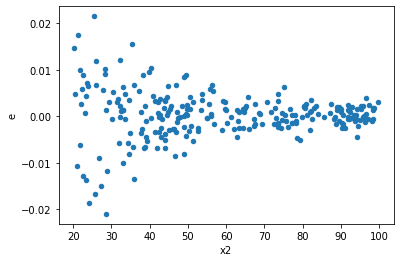

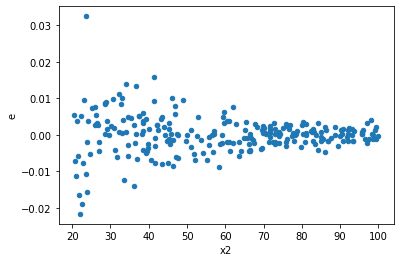

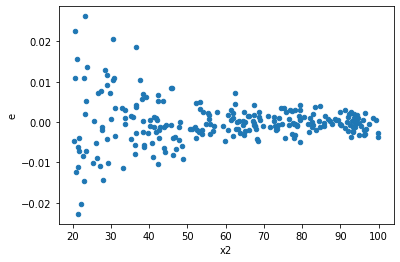

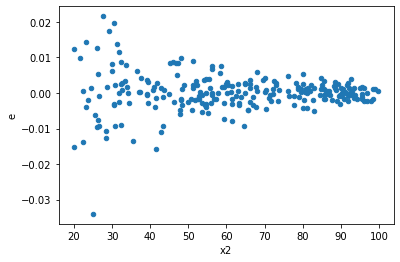

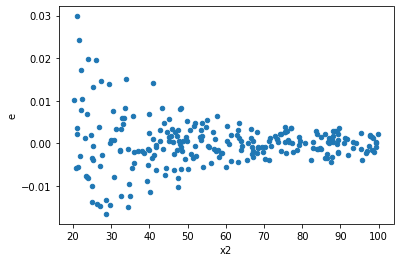

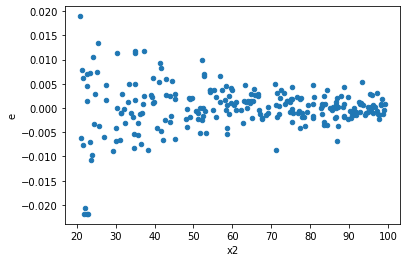

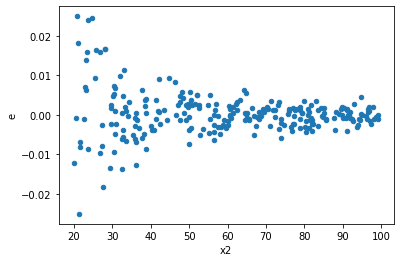

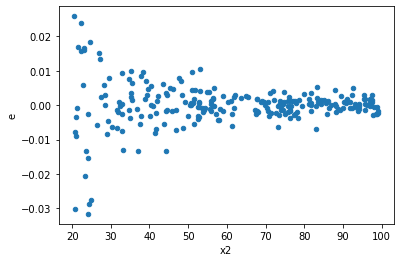

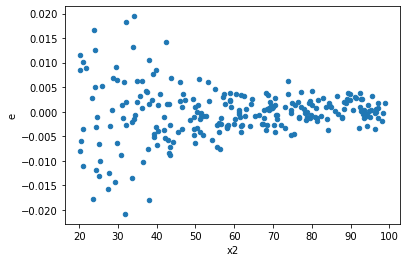

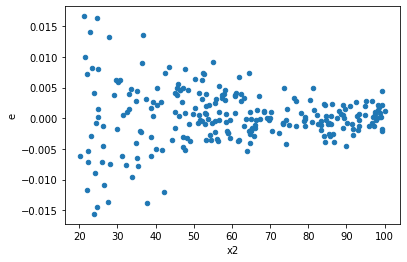

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,0.005637932376512488,0.00039249530010768146,5.8728462255338415e-05,4.0884927094550155e-06,0.06961688681169872,3.25157479919864e-31,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,0.005425906125604294,0.00032900277008966695,5.6519855475044724e-05,3.4271121884340306e-06,0.060635544086753854,9.476144031331505e-34,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,0.006968101729762411,0.0004113683153992783,7.258439301835845e-05,4.285086618742482e-06,0.05903592274524737,3.0260438733312005e-34,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,0.006025092339962942,0.0004062087124381742,6.276137854128064e-05,4.231340754564314e-06,0.06741949990440688,8.460007882209617e-32,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,0.007022921903201364,0.0004072040129472938,7.315543649168088e-05,4.2417084682009766e-06,0.057982136005481105,1.3996628879661342e-34,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,0.004953394886786371,0.0004166137338767281,5.1597863404024695e-05,4.339726394549251e-06,0.08410670729847987,8.034810261590614e-28,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,0.006987246533863367,0.0003986859351299898,7.278381806107674e-05,4.152978490937394e-06,0.05705909090194212,7.032353440496389e-35,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,0.009686018730010156,0.00043491518591013263,0.00010089602843760579,4.530366519897215e-06,0.044901336455466116,2.108285141294351e-39,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,0.005967003840848955,0.0004357604080555871,6.215629000884328e-05,4.539170917245699e-06,0.0730283438184597,2.3961769856719735e-30,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64